# <b><u> Project Title : Predicting the running times for multiplying two 2048 x 2048 matrices using a GPU OpenCL SGEMM kernel with varying parameters (using the library 'CLTune'). </u></b>

## <b> Problem Description </b>

### This data set measures the running time of a matrix-matrix product $A*B = C$, where all matrices have size 2048 x 2048, using a parameterizable SGEMM GPU kernel with 241600 possible parameter combinations. For each tested combination, 4 runs were performed and their results are reported as the 4 last columns. All times are measured in milliseconds*.

### There are 14 parameter, the first 10 are ordinal and can only take up to 4 different powers of two values, and the 4 last variables are binary. Out of 1327104 total parameter combinations, only 241600 are feasible (due to various kernel constraints). This data set contains the results for all these feasible combinations.

### The experiment was run on a desktop workstation running Ubuntu 16.04 Linux with an Intel Core i5 (3.5GHz), 16GB RAM, and a NVidia Geforce GTX 680 4GB GF580 GTX-1.5GB GPU. We use the 'gemm_fast' kernel from the automatic OpenCL kernel tuning library 'CLTune' ([Web Link]).

#### * Note: for this kind of data sets it is usually better to work with the logarithm of the running times 


## <b> Data Description </b>

### <b>Attribute Information: </b>

### Independent variables:
* ### MWG, NWG: per-matrix 2D tiling at workgroup level: {16, 32, 64, 128} (integer)
* ### KWG: inner dimension of 2D tiling at workgroup level: {16, 32} (integer)
* ### MDIMC, NDIMC: local workgroup size: {8, 16, 32} (integer)
* ### MDIMA, NDIMB: local memory shape: {8, 16, 32} (integer)
* ### KWI: kernel loop unrolling factor: {2, 8} (integer)
* ### VWM, VWN: per-matrix vector widths for loading and storing: {1, 2, 4, 8} (integer)
* ### STRM, STRN: enable stride for accessing off-chip memory within a single thread: {0, 1} (categorical)
* ### SA, SB: per-matrix manual caching of the 2D workgroup tile: {0, 1} (categorical)

### Output:
* ### Run1, Run2, Run3, Run4: performance times in milliseconds for 4 independent runs using the same parameters. They range between 13.25 and 3397.08.

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/alma/module 3/sgemm_product.csv')

In [ ]:
df_features=pd.read_csv('/content/drive/MyDrive/alma/module 3/sgemm_product.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81


In [ ]:
df['Run1 (ms)']=df['Run1 (ms)'].apply(lambda x : np.log10(x))
df['Run2 (ms)']=df['Run2 (ms)'].apply(lambda x : np.log10(x))
df['Run3 (ms)']=df['Run3 (ms)'].apply(lambda x : np.log10(x))
df['Run4 (ms)']=df['Run4 (ms)'].apply(lambda x : np.log10(x))

In [ ]:
df.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,2.061679,2.063971,2.073902,2.063709
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,1.892818,1.893484,1.898999,1.898670
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,1.902221,1.906820,1.907196,1.908324
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,1.925931,1.953760,1.938269,1.932372
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,2.061189,2.086289,2.088951,2.059980


In [ ]:
df.isnull().sum()

MWG          0
NWG          0
KWG          0
MDIMC        0
NDIMC        0
MDIMA        0
NDIMB        0
KWI          0
VWM          0
VWN          0
STRM         0
STRN         0
SA           0
SB           0
Run1 (ms)    0
Run2 (ms)    0
Run3 (ms)    0
Run4 (ms)    0
dtype: int64

In [ ]:
df.describe()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
count,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000
mean,80.415364,80.415364,25.513113,13.935894,13.935894,17.371126,17.371126,5.000000,2.448609,2.448609,0.500000,0.500000,0.500000,0.500000,2.007729,2.007972,2.007686,2.007613
std,42.469220,42.469220,7.855619,7.873662,7.873662,9.389418,9.389418,3.000006,1.953759,1.953759,0.500001,0.500001,0.500001,0.500001,0.490230,0.489992,0.490147,0.490208
min,16.000000,16.000000,16.000000,8.000000,8.000000,8.000000,8.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.123525,1.122216,1.125806,1.126131
25%,32.000000,32.000000,16.000000,8.000000,8.000000,8.000000,8.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.609167,1.609701,1.609167,1.608954
50%,64.000000,64.000000,32.000000,8.000000,8.000000,16.000000,16.000000,5.000000,2.000000,2.000000,0.500000,0.500000,0.500000,0.500000,1.844011,1.844664,1.843793,1.843980
75%,128.000000,128.000000,32.000000,16.000000,16.000000,32.000000,32.000000,8.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,2.358943,2.358525,2.358544,2.358544
max,128.000000,128.000000,32.000000,32.000000,32.000000,32.000000,32.000000,8.000000,8.000000,8.000000,1.000000,1.000000,1.000000,1.000000,3.523698,3.528328,3.531106,3.526560


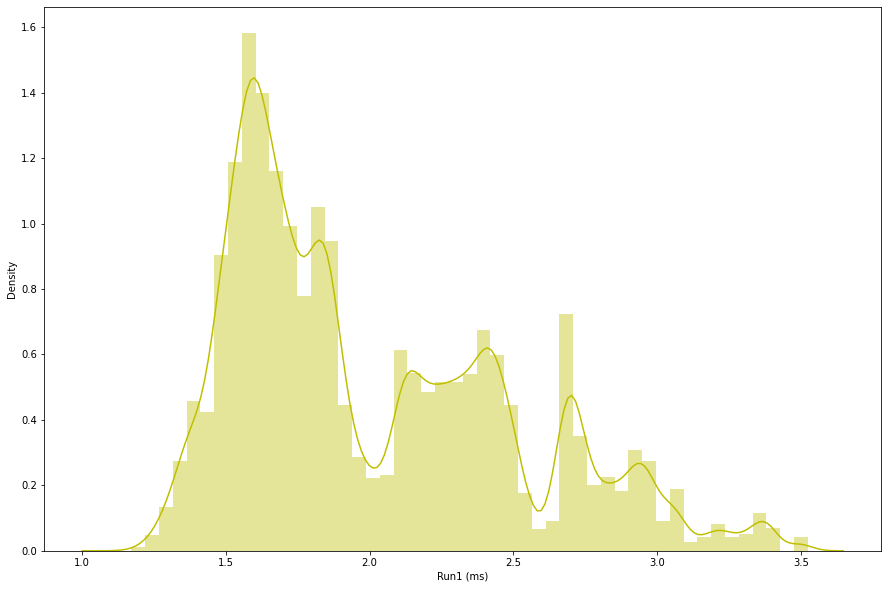

In [ ]:
plt.figure(figsize=(15,10))
sns.distplot(df['Run1 (ms)'],color="y")

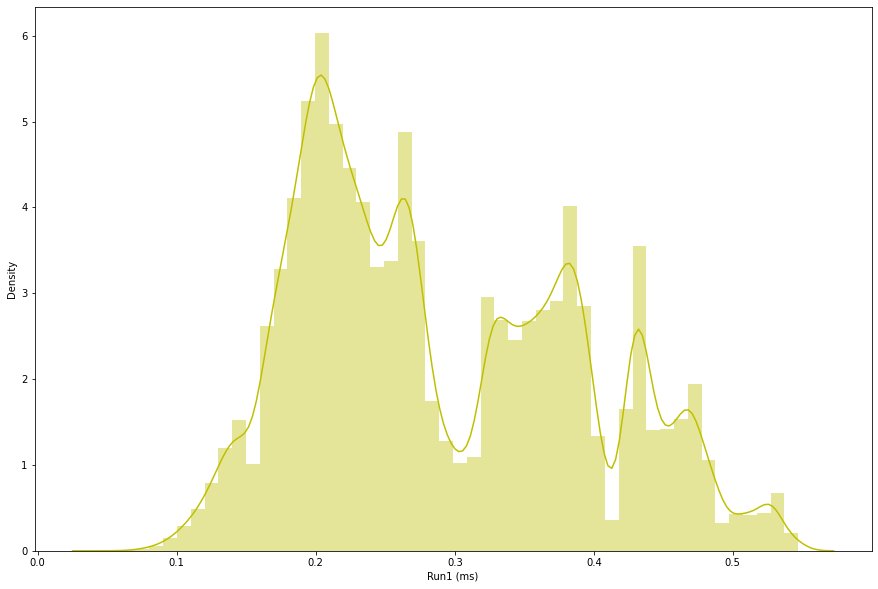

In [ ]:
plt.figure(figsize=(15,10))
sns.distplot(np.log10(df['Run1 (ms)']),color="y")

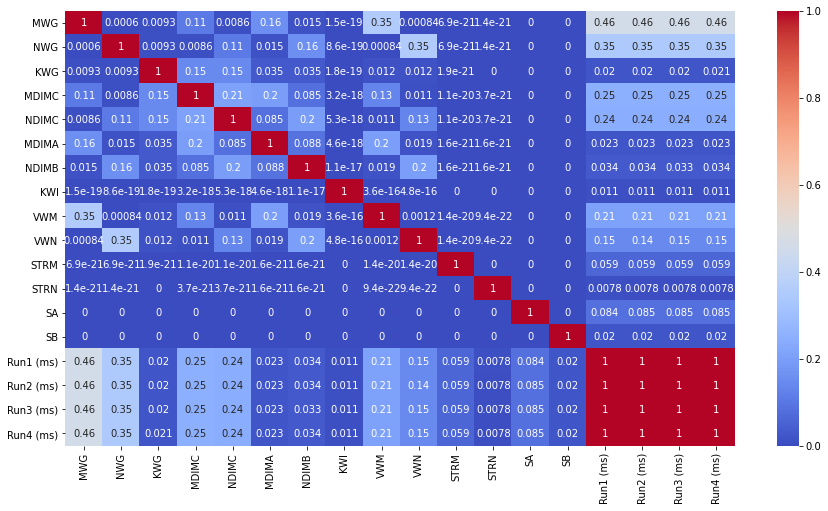

In [ ]:
 ## Correlation
plt.figure(figsize=(15,8))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')


In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(df[[i for i in df.describe().columns]])

,variables,VIF
0,MWG,7.573733
1,NWG,6.962595
2,KWG,11.757469
3,MDIMC,5.142641
4,NDIMC,5.103204
5,MDIMA,4.988949
6,NDIMB,4.985803
7,KWI,3.604883
8,VWM,3.158311
9,VWN,3.138072


In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Run1 (ms)','KWG','STRM',	'STRN',	'SA',	'SB',	'Run1 (ms)'	,'Run2 (ms)',	'Run3 (ms)',	'Run4 (ms)']]])

,variables,VIF
0,MWG,5.498424
1,NWG,5.498424
2,MDIMC,4.088582
3,NDIMC,4.088582
4,MDIMA,4.759114
5,NDIMB,4.759114
6,KWI,3.314728
7,VWM,3.018377
8,VWN,3.018377


In [ ]:
df_features.drop(columns=['KWG','Run2 (ms)',	'Run3 (ms)',	'Run4 (ms)'],inplace=True)

In [ ]:
df.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,2.061679,2.063971,2.073902,2.063709
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,1.892818,1.893484,1.898999,1.898670
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,1.902221,1.906820,1.907196,1.908324
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,1.925931,1.953760,1.938269,1.932372
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,2.061189,2.086289,2.088951,2.059980


In [ ]:
df_features.head()

,MWG,NWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms)
0,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26
1,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13
2,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84
3,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32
4,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13


In [ ]:
df_features.drop(columns='Run1 (ms)',inplace=True)

In [ ]:
features=df_features.columns
from scipy.stats import zscore
X = df_features[features]

In [ ]:
X

,MWG,NWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB
0,16,16,8,8,8,8,2,1,1,0,0,0,0
1,16,16,8,8,8,8,2,1,1,0,0,0,1
2,16,16,8,8,8,8,2,1,1,0,0,1,0
3,16,16,8,8,8,8,2,1,1,0,0,1,1
4,16,16,8,8,8,8,2,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
241595,128,128,32,32,32,32,8,4,4,1,0,1,1
241596,128,128,32,32,32,32,8,4,4,1,1,0,0
241597,128,128,32,32,32,32,8,4,4,1,1,0,1
241598,128,128,32,32,32,32,8,4,4,1,1,1,0


In [ ]:
df

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,2.061679,2.063971,2.073902,2.063709
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,1.892818,1.893484,1.898999,1.898670
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,1.902221,1.906820,1.907196,1.908324
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,1.925931,1.953760,1.938269,1.932372
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,2.061189,2.086289,2.088951,2.059980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241595,128,128,32,32,32,32,32,8,4,4,1,0,1,1,1.254306,1.249687,1.249687,1.249687
241596,128,128,32,32,32,32,32,8,4,4,1,1,0,0,1.556785,1.556664,1.556785,1.556664
241597,128,128,32,32,32,32,32,8,4,4,1,1,0,1,1.547529,1.541829,1.547405,1.547405
241598,128,128,32,32,32,32,32,8,4,4,1,1,1,0,1.453777,1.454692,1.453930,1.454082


In [ ]:
y = np.log10(df['Run1 (ms)'])

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(193280, 13)
(48320, 13)


In [ ]:
X

,MWG,NWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB
0,16,16,8,8,8,8,2,1,1,0,0,0,0
1,16,16,8,8,8,8,2,1,1,0,0,0,1
2,16,16,8,8,8,8,2,1,1,0,0,1,0
3,16,16,8,8,8,8,2,1,1,0,0,1,1
4,16,16,8,8,8,8,2,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
241595,128,128,32,32,32,32,8,4,4,1,0,1,1
241596,128,128,32,32,32,32,8,4,4,1,1,0,0
241597,128,128,32,32,32,32,8,4,4,1,1,0,1
241598,128,128,32,32,32,32,8,4,4,1,1,1,0


In [ ]:
y

0         0.314221
1         0.277109
2         0.279261
3         0.284641
4         0.314118
            ...   
241595    0.098404
241596    0.192229
241597    0.189639
241598    0.162498
241599    0.098236
Name: Run1 (ms), Length: 241600, dtype: float64

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)


In [ ]:
reg.score(X_train, y_train)

0.5267629091036892

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error(10**(y_test), 10**(y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 0.09688167234114346
RMSE : 0.31125820847191077


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(10**(y_test), 10**(y_pred))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.5938570055373781
Adjusted R2 :  0.5937477052656103


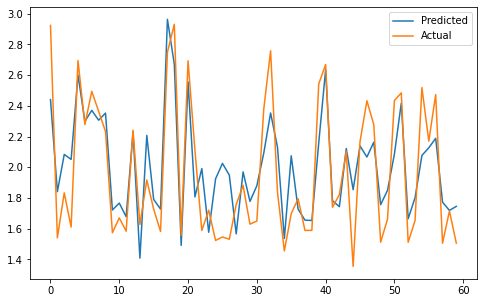

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred[:60]))
plt.plot(np.array(10**(y_test[:60])))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.1 , max_iter= 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=3000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
lasso.score(X_train, y_train)

0.46308388665994227

In [ ]:
y_pred_l = lasso.predict(X_test)

In [ ]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_l))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_l))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_l)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 0.1184193203101788
RMSE : 0.34412108379199724
R2 : 0.5035678452819248
Adjusted R2 :  0.5034342465982967


In [ ]:
### Cross validation
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-08}

Using  {'alpha': 1e-08}  the negative mean squared error is:  -0.0048566755429286556


In [ ]:
y_pred_lasso = lasso_regressor.predict(X_test)

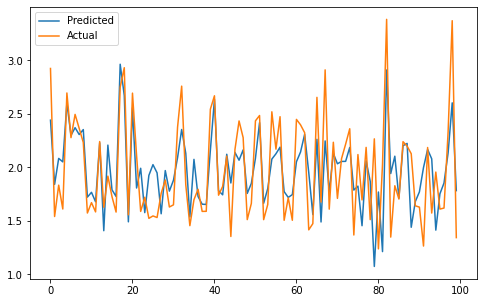

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_lasso)[:100])
plt.plot(10**(np.array(y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_lasso))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_lasso))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 0.09688166677534629
RMSE : 0.3112581995311068
R2 : 0.593857028870063
Adjusted R2 :  0.5937477286045745


In [ ]:
from sklearn.linear_model import Ridge

ridge  = Ridge(alpha=0.1)

In [ ]:
ridge.fit(X_train,y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
ridge.score(X_train, y_train)

0.5267629091036112

In [ ]:
y_pred_r = ridge.predict(X_test)

In [ ]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_r))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_r))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 0.09688166766668
RMSE : 0.31125820096293044
R2 : 0.5938570251334538
Adjusted R2 :  0.5937477248669597


In [ ]:
# Hyperprarameter tuning
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 20}

Using  {'alpha': 20}  the negative mean squared error is:  -0.004856675498774266


In [ ]:
#Model Prediction
y_pred_ridge = ridge_regressor.predict(X_test)

In [ ]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_ridge))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_ridge))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 0.09688073851983472
RMSE : 0.3112567083933047
R2 : 0.5938609202611176
Adjusted R2 :  0.5937516210428713


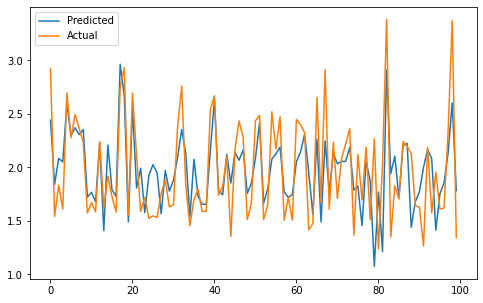

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_ridge[:100]))
plt.plot(10**(np.array(y_test[:100])))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [ ]:
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
elasticnet.score(X_train, y_train)

0.4950712090874665

In [ ]:
y_pred_en = elasticnet.predict(X_test)

In [ ]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_en))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_en))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 0.10654026813933715
RMSE : 0.3264050675760674
R2 : 0.5533666741363112
Adjusted R2 :  0.5532464771993628


In [ ]:
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
y_pred_elastic = elastic_regressor.predict(X_test)

In [ ]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-08, 'l1_ratio': 0.8}

Using  {'alpha': 1e-08, 'l1_ratio': 0.8}  the negative mean squared error is:  -0.004856663966821803


In [ ]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_elastic))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_elastic))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_elastic)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 0.09688166787043055
RMSE : 0.31125820129023196
R2 : 0.5938570242793
Adjusted R2 :  0.5937477240125759


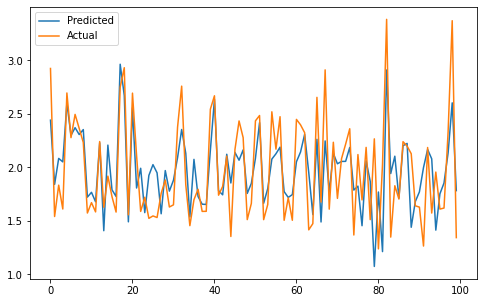

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_elastic[:100]))
plt.plot(10**(np.array(y_test[:100])))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
xgb_r = xg.XGBRegressor()
parameters = {'objective': ['reg:linear'],'n_estimators':[10,20,30,40,50],'seed':[50,100,125,150]}
xgb_regressor = GridSearchCV(xgb_r, parameters, scoring='neg_mean_squared_error',cv=5)
xgb_regressor.fit(X_train, y_train)

[13:27:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:27:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:27:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:27:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:27:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:27:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:27:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:27:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'n_estimators': [10, 20, 30, 40, 50],
                         'objective': ['reg:linear'],
               

In [ ]:
print("The best fit alpha value is found out to be :" ,xgb_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", xgb_regressor.best_score_)

The best fit alpha value is found out to be : {'n_estimators': 50, 'objective': 'reg:linear', 'seed': 50}

Using  {'alpha': 1e-08, 'l1_ratio': 0.8}  the negative mean squared error is:  -0.0022909367373079195


In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error(10**(y_test), 10**(y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 0.09688167234114346
RMSE : 0.31125820847191077


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(10**(y_test), 10**(y_pred))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.5938570055373781
Adjusted R2 :  0.5937477052656103


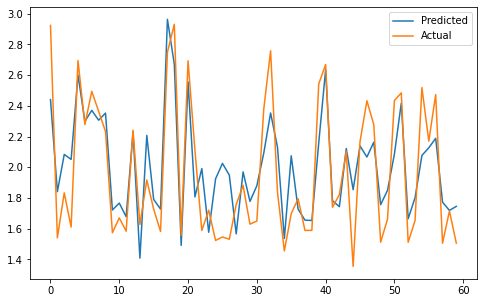

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred[:60]))
plt.plot(np.array(10**(y_test[:60])))
plt.legend(["Predicted","Actual"])
plt.show()